
Running Gradient Descent ...
Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx)
 -3.6303
  1.1664

    legend at line 478 column 13
Visualizing J(theta_0, theta_1) ...


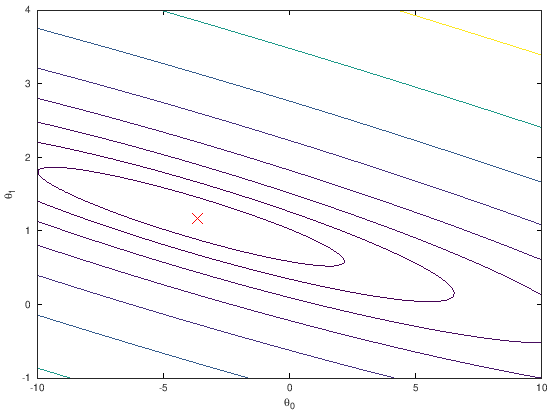

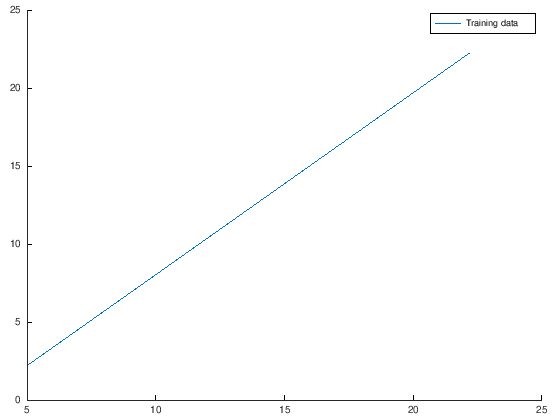

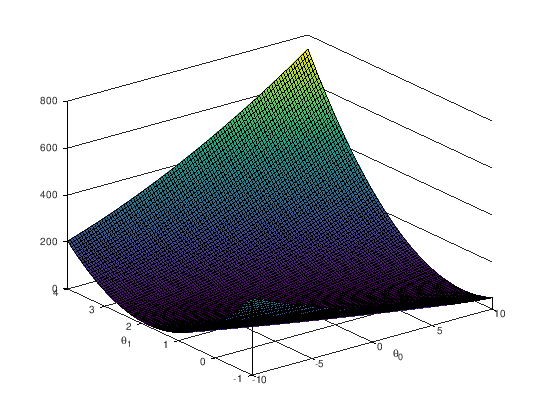

In [7]:
function J = computeCost(X, y, theta)
m = length(y); % number of training examples
J = 0;

producto = X * theta;
resta = sum((producto-y).^2);
J= resta/(2*m);
end

function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    producto = X * theta;
    dis = producto -y;
    st0 = sum((dis .* X(:,1)));
    st1 = sum((dis .* X(:,2)));
    t0 = theta(1,1) - (alpha * st0)/m;
    t1 = theta(2,1) - (alpha * st1)/m;
    theta = [t0;t1];
    J_history(iter) = computeCost(X, y, theta);

end
end

data = load('../../ML-ex1/ex1data1.txt');
X = data(:, 1);
y = data(:, 2);
m = length(y); % number of training examples
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1);
iterations = 1500;
alpha = 0.01;
fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);